# Online Retail Exploratory Data Analysis

## Case Study
Work with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. 

**Task:** 

Explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.. 

**Takeaways:**
- Identify patterns, outliers, and correlations in the data, allows us to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. 
- Through visualizations and statistical analysis, we will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

It can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

### Import Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

In [5]:
retail_data = pd.read_excel(url)
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We can drop the columns that are not necessary for our analysis.

In our case, we can drop the `StockCode` and `Description` columns.

In [7]:
retail_data.drop(['StockCode', 'Description'], axis=1, inplace=True)

In [8]:
retail_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
retail_data['Date'] = pd.to_datetime(retail_data['InvoiceDate'])

In [10]:
retail_data['Year'] = retail_data['Date'].dt.year
retail_data['Month'] = retail_data['Date'].dt.month
retail_data['Day'] = retail_data['Date'].dt.day

In [11]:
retail_data.drop(['InvoiceDate'], axis=1, inplace=True)

In [12]:
retail_data.columns

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'Date',
       'Year', 'Month', 'Day'],
      dtype='object')

Lets look at the dataset for any missing information

In [13]:
retail_data.isnull().sum(), retail_data.shape

(InvoiceNo          0
 Quantity           0
 UnitPrice          0
 CustomerID    135080
 Country            0
 Date               0
 Year               0
 Month              0
 Day                0
 dtype: int64,
 (541909, 9))

In [14]:
retail_data[retail_data.isnull().any(axis=1)]

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Date,Year,Month,Day
622,536414,56,0.00,NaN,United Kingdom,2010-12-01 11:52:00,2010,12,1
1443,536544,1,2.51,NaN,United Kingdom,2010-12-01 14:32:00,2010,12,1
1444,536544,2,2.51,NaN,United Kingdom,2010-12-01 14:32:00,2010,12,1
1445,536544,4,0.85,NaN,United Kingdom,2010-12-01 14:32:00,2010,12,1
1446,536544,2,1.66,NaN,United Kingdom,2010-12-01 14:32:00,2010,12,1
...,...,...,...,...,...,...,...,...,...
541536,581498,5,4.13,NaN,United Kingdom,2011-12-09 10:26:00,2011,12,9
541537,581498,4,4.13,NaN,United Kingdom,2011-12-09 10:26:00,2011,12,9
541538,581498,1,4.96,NaN,United Kingdom,2011-12-09 10:26:00,2011,12,9
541539,581498,1,10.79,NaN,United Kingdom,2011-12-09 10:26:00,2011,12,9


Lets calculate how much information we will lose if we drop the missing values

In [15]:

total_rows_before = retail_data.shape[0]

retail_data_dropped = retail_data.dropna()

total_rows_after = retail_data_dropped.shape[0]

# Calculate the percentage of information lost
information_lost = (total_rows_before - total_rows_after) / total_rows_before * 100

information_lost


24.926694334288598

we will lose 25% of the data if we drop the missing values. Since this project is an exploratory data analysis, we will drop the missing values.

In [16]:
retail_data.dropna(inplace=True)

Lets see if any of the rows are duplicated

In [17]:
retail_data.duplicated().sum()

151429

In [18]:
retail_data.drop_duplicates(inplace=True)

### Lets work on Descriptive Statistics

In [19]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID,Date,Year,Month,Day
count,255400.000000,255400.000000,255400.000000,255400,255400.000000,255400.000000,255400.000000
mean,13.548125,4.095482,15287.813269,2011-07-09 04:49:05.854816,2010.931684,7.586335,14.995775
min,-80995.000000,0.000000,12346.000000,2010-12-01 08:26:00,2010.000000,1.000000,1.000000
25%,2.000000,1.250000,13900.000000,2011-04-05 12:50:00,2011.000000,5.000000,7.000000
50%,6.000000,2.080000,15159.000000,2011-07-27 10:40:00,2011.000000,8.000000,15.000000
75%,12.000000,4.150000,16791.000000,2011-10-20 11:32:30,2011.000000,11.000000,22.000000
max,80995.000000,38970.000000,18287.000000,2011-12-09 12:50:00,2011.000000,12.000000,31.000000
std,313.323337,87.454866,1714.323608,NaN,0.252289,3.428350,8.643329


- We can see that for both Quantity and UnitPrice, the mean is greater than the median, indicating that the distribution is right-skewed.
- There are also some negative values in the Quantity column, which may indicate returns or refunds.
- The maximum value for Quantity is extremely high, which could be an outlier.
- The maximum value for UnitPrice is also very high, which could be an outlier.
- The standard deviation for Quantity and UnitPrice is quite large, indicating a wide dispersion of values around the mean.

In [20]:
retail_data[retail_data['Quantity']<0].sort_values('Quantity')

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Date,Year,Month,Day
540422,C581484,-80995,2.08,16446.0,United Kingdom,2011-12-09 09:27:00,2011,12,9
61624,C541433,-74215,1.04,12346.0,United Kingdom,2011-01-18 10:17:00,2011,1,18
4287,C536757,-9360,0.03,15838.0,United Kingdom,2010-12-02 14:23:00,2010,12,2
160145,C550456,-3114,2.10,15749.0,United Kingdom,2011-04-18 13:08:00,2011,4,18
160144,C550456,-2000,1.85,15749.0,United Kingdom,2011-04-18 13:08:00,2011,4,18
...,...,...,...,...,...,...,...,...,...
343180,C566943,-1,8.50,16293.0,United Kingdom,2011-09-15 16:17:00,2011,9,15
343181,C566944,-1,1.65,15449.0,United Kingdom,2011-09-15 16:22:00,2011,9,15
170323,C551285,-1,4.95,15005.0,United Kingdom,2011-04-27 14:07:00,2011,4,27
342135,C566820,-1,85.00,17214.0,United Kingdom,2011-09-15 11:30:00,2011,9,15


In [21]:
retail_data[retail_data['Quantity']>100].sort_values('Quantity')

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Date,Year,Month,Day
191451,553368,101,4.58,18102.0,United Kingdom,2011-05-16 14:24:00,2011,5,16
460032,575894,102,0.50,12748.0,United Kingdom,2011-11-11 14:25:00,2011,11,11
282817,561659,102,3.21,17450.0,United Kingdom,2011-07-28 16:11:00,2011,7,28
225587,556723,104,5.88,18102.0,United Kingdom,2011-06-14 11:25:00,2011,6,14
353421,567803,104,5.64,18102.0,United Kingdom,2011-09-22 12:11:00,2011,9,22
...,...,...,...,...,...,...,...,...,...
206121,554868,4300,0.72,13135.0,United Kingdom,2011-05-27 10:52:00,2011,5,27
421632,573008,4800,0.21,12901.0,United Kingdom,2011-10-27 12:26:00,2011,10,27
502122,578841,12540,0.00,13256.0,United Kingdom,2011-11-25 15:57:00,2011,11,25
61619,541431,74215,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,2011,1,18


In [22]:
retail_data.sort_values('UnitPrice', ascending=False)

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Date,Year,Month,Day
222681,C556445,-1,38970.00,15098.0,United Kingdom,2011-06-10 15:31:00,2011,6,10
173382,551697,1,8142.75,16029.0,United Kingdom,2011-05-03 13:46:00,2011,5,3
173277,C551685,-1,8142.75,16029.0,United Kingdom,2011-05-03 12:51:00,2011,5,3
173391,C551699,-1,6930.00,16029.0,United Kingdom,2011-05-03 14:12:00,2011,5,3
268027,C560372,-1,4287.63,17448.0,United Kingdom,2011-07-18 12:26:00,2011,7,18
...,...,...,...,...,...,...,...,...,...
439361,574469,12,0.00,12431.0,Australia,2011-11-04 11:55:00,2011,11,4
187613,553000,4,0.00,17667.0,United Kingdom,2011-05-12 15:21:00,2011,5,12
358655,568158,1,0.00,16133.0,United Kingdom,2011-09-25 12:22:00,2011,9,25
139453,548318,5,0.00,13113.0,United Kingdom,2011-03-30 12:45:00,2011,3,30


Also from observation we can see that InvoiceNo starting with C is a return transaction or order cancellation. So lets remove the corresponding counter transactions from the dataset for further analysis

In [23]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255400 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   InvoiceNo   255400 non-null  object        
 1   Quantity    255400 non-null  int64         
 2   UnitPrice   255400 non-null  float64       
 3   CustomerID  255400 non-null  float64       
 4   Country     255400 non-null  object        
 5   Date        255400 non-null  datetime64[ns]
 6   Year        255400 non-null  int32         
 7   Month       255400 non-null  int32         
 8   Day         255400 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(2)
memory usage: 16.6+ MB


In [24]:
retail_data['InvoiceNo'] = retail_data['InvoiceNo'].astype(str)

In [25]:
retail_data.sort_values('UnitPrice', ascending=False, inplace=True)
retail_data = retail_data[1:]

In [26]:
# # dataset based on InvoiceNo starting with "C"
# returns_data = retail_data[retail_data['InvoiceNo'].str.startswith('C')]

# # dataset based on InvoiceNo not starting with "C"
# sales_data = retail_data[~retail_data['InvoiceNo'].str.startswith('C')]

### Data Visualization

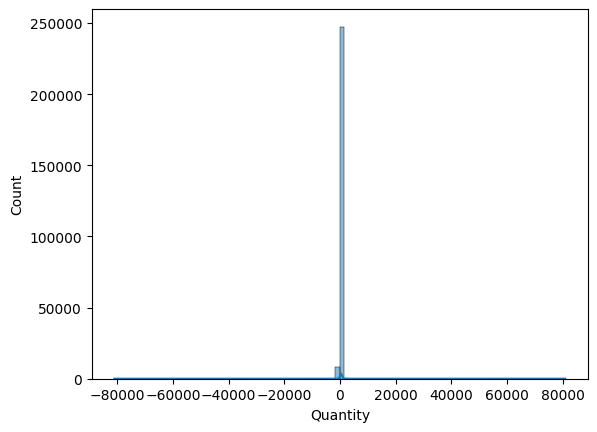

In [43]:
sns.histplot(data=retail_data, x='Quantity', bins=100, kde=True)
plt.show()

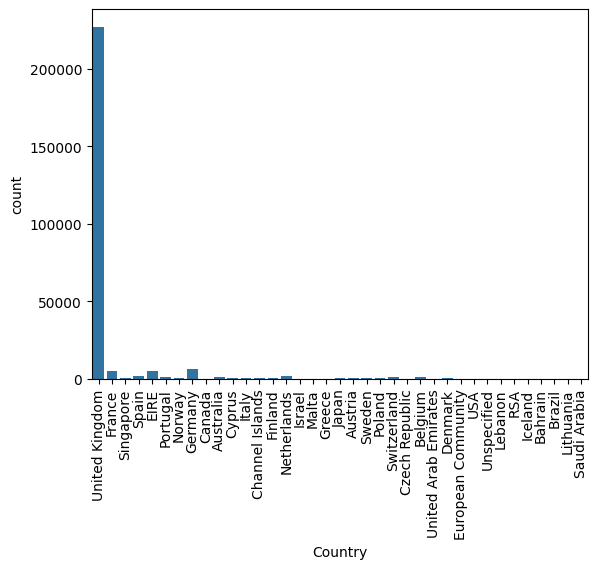

In [42]:
sns.countplot(data=retail_data, x='Country')
plt.xticks(rotation=90)
plt.show()

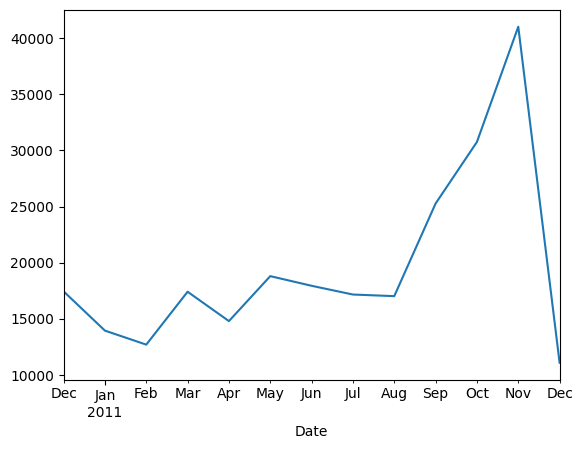

In [44]:
retail_data.resample('M', on='Date')['InvoiceNo'].count().plot()
plt.show()

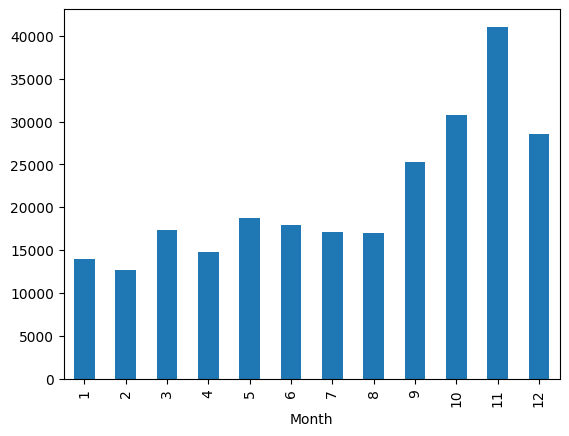

In [47]:
retail_data.groupby('Month')['InvoiceNo'].count().plot(kind='bar')
plt.show()